<img src="http://milepro.com/wp-content/uploads/2014/01/Travel-Credit-Cards-1024x606.jpg" style="width:200px; float: left; padding-right: 10px"/>
<h2 style="font-face: verdana; font-size: 32px;">Predict credit card customer churn<br>with IBM Watson Machine Learning</h2>
<h3 style="font-face: verdana; font-size: 16px;">Part 1: Data Exploration</h3>

## Churn Rate Trend

In [1]:
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np

In [4]:
# The code was removed by DSX for sharing.

YEAR   QUARTER QUARTER_YEAR  CHURN_RATE
0  2014         1         1Q14        18.1
1  2014         2         2Q14        18.7
2  2014         3         3Q14        19.3
3  2014         4         4Q14        19.9
4  2015         1         1Q15        20.5

<div style="background-color: #e7f2fa; color: #333">
  <h3 style="background-color: #6ab0de">CHURN DATA</h3>
  <p>Load Churn_Rate.csv from IBM Bluemix Object Store.</p>
</div>

In [7]:
churnDataRate = pd.read_csv(get_object_storage_file_with_credentials_05c30ea585c743be863f3cc490872dea('BankingChurnBoston', 'Churn_Rate.csv'))
churnDataRate.head()


YEAR   QUARTER QUARTER_YEAR  CHURN_RATE
0  2014         1         1Q14        18.1
1  2014         2         2Q14        18.7
2  2014         3         3Q14        19.3
3  2014         4         4Q14        19.9
4  2015         1         1Q15        20.5


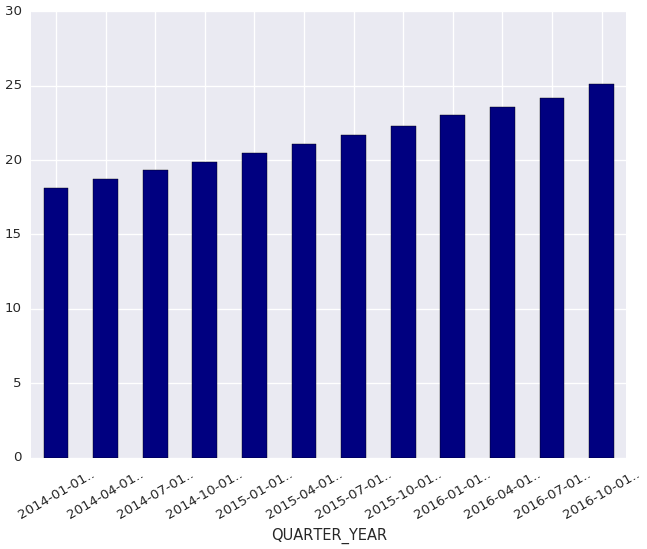

In [8]:
import pixiedust
display(churnDataRate)


In [9]:
import brunel
%brunel data('churnDataRate') x(QUARTER_YEAR) y(CHURN_RATE) bar tooltip(#all) axes(x:'Time', y:'Churn Rate':grid) sort(YEAR:ascending) :: width=800, height=500
    

<IPython.core.display.Javascript object>

<div style="background-color: #e7f2fa; color: #333">
  <h3 style="background-color: #6ab0de">CUSTOMER PROFILE</h3>
  <p>Load TEST_SUM.csv from IBM Bluemix Object Store.</p>
</div>

In [10]:
churnData = pd.read_csv(get_object_storage_file_with_credentials_05c30ea585c743be863f3cc490872dea('BankingChurnBoston', 'TEST_SUM.csv'))
churnData.head()

CUST_ID SEX  AGE  EDUCATION  INVESTMENT   INCOME  ACTIVITY  CHURN  \
0  1009530860   F   84          2      114368  3852862         5      0   
1  1009544000   F   44          2       90298  3849843         1      0   
2  1009534260   F   23          2       94881  3217364         1      1   
3  1009574010   F   24          2      112099  2438218         4      1   
4  1009578620   F   67          5       84638  2428245         3      0   

   YRLY_AMT  AVG_DAILY_TX  YRLY_TX  AVG_TX_AMT  NEGTWEETS STATE  \
0    700259      0.917808      335   2090.3200          3    TX   
1    726977      0.950685      347   2095.0400         10    CA   
2    579084      0.920548      336   1723.4600          5    CA   
3    470964      0.994521      363   1297.4199          2    WA   
4    446615      0.917808      335   1333.1799         10    CT   

    EDUCATION_GROUP  TwitterID CHURN_LABEL          INSERT_TIME  
0  Bachelors degree          0       False  2017-02-09 11:00:00  
1  Bachelors degree          0       False  2017-02-09 11:00:00  
2  Bachelors degree          0        True  2017-02-09 11:00:00  
3  Bachelors degree          0        True  2017-02-09 11:00:00  
4         Doctorate          0       False  2017-02-09 11:00:00

In [13]:
#import numpy as np
groupedByState = churnData.groupby("STATE").agg({"INCOME" : np.average}).rename(columns={"INCOME" : "mean_income"})
groupedByState.head()

mean_income
STATE              
AK     33184.623529
AL     25630.486842
AR     26104.265823
AZ     25862.160920
CA     73914.220149

## Income by state

In [14]:
import brunel
%brunel data('groupedByState') map key(STATE) x(STATE) color(mean_income) label(STATE) tooltip(#all) :: width=800, height=500
    

<IPython.core.display.Javascript object>

## Distribution by churn

In [15]:
import brunel
%brunel data('churnData') x(AGE) y(#count:linear) color(CHURN_LABEL) bin(AGE) interaction(select) stack bar tooltip(#all) filter(CHURN_LABEL) legends(none) | x(AVG_DAILY_TX) y(#count:linear) color(CHURN_LABEL) opacity(#selection) bin(AVG_DAILY_TX) stack bar tooltip(#all) axes(x:10:'AVG DAILY TX', y)| x(AVG_TX_AMT) y(#count:linear) color(CHURN_LABEL) opacity(#selection) bin(AVG_TX_AMT) stack bar tooltip(#all)  axes(x:10:'AVG_TX_AMT', y) legends(none) | x(INCOME) y(#count:linear) color(CHURN_LABEL) opacity(#selection) bin(INCOME) stack bar tooltip(#all) tooltip(#all) axes(x:10:'INCOME', y) legends(none):: width=800, height=600


<IPython.core.display.Javascript object>

In [16]:
import brunel
%brunel data('churnData') x(SEX) y(#count:linear) color(CHURN_LABEL) stack bar tooltip(#all) sort(SEX) interaction(select) filter(CHURN_LABEL) axes(x:'GENDER', y) legends(none) | x(EDUCATION_GROUP) y(#count:linear) color(CHURN_LABEL) stack bar tooltip(#all) sort(#count) opacity(#selection)  axes(x:'EDUCATION', y)  | x(ACTIVITY) y(#count:linear) color(CHURN_LABEL) stack bar tooltip(#all) sort(ACTIVITY) opacity(#selection) legends(none) :: width=800, height=600


<IPython.core.display.Javascript object>

In [17]:
churnData.head()

CUST_ID SEX  AGE  EDUCATION  INVESTMENT   INCOME  ACTIVITY  CHURN  \
0  1009530860   F   84          2      114368  3852862         5      0   
1  1009544000   F   44          2       90298  3849843         1      0   
2  1009534260   F   23          2       94881  3217364         1      1   
3  1009574010   F   24          2      112099  2438218         4      1   
4  1009578620   F   67          5       84638  2428245         3      0   

   YRLY_AMT  AVG_DAILY_TX  YRLY_TX  AVG_TX_AMT  NEGTWEETS STATE  \
0    700259      0.917808      335   2090.3200          3    TX   
1    726977      0.950685      347   2095.0400         10    CA   
2    579084      0.920548      336   1723.4600          5    CA   
3    470964      0.994521      363   1297.4199          2    WA   
4    446615      0.917808      335   1333.1799         10    CT   

    EDUCATION_GROUP  TwitterID CHURN_LABEL          INSERT_TIME  
0  Bachelors degree          0       False  2017-02-09 11:00:00  
1  Bachelors degree          0       False  2017-02-09 11:00:00  
2  Bachelors degree          0        True  2017-02-09 11:00:00  
3  Bachelors degree          0        True  2017-02-09 11:00:00  
4         Doctorate          0       False  2017-02-09 11:00:00

In [18]:
groupedchurnByState = churnData.groupby("STATE").agg({"CHURN" : np.average}).rename(columns={"CHURN" : "mean_churn"})
groupedchurnByState.head()


mean_churn
STATE            
AK       0.000000
AL       0.000000
AR       0.000000
AZ       0.000000
CA       0.645522

In [19]:
import brunel
%brunel data('groupedchurnByState') map key(STATE) x(STATE) color(mean_churn) label(STATE) tooltip(#all) :: width=800, height=500


<IPython.core.display.Javascript object>

<p><a href="https://apsportal.ibm.com/analytics/notebooks/c7807f07-0113-4bbd-914a-6ee51d772964?projectid=c7dbd1ba-6c0a-4e4b-a6fe-7c55b5e131ab&projectTitle=Banking%20Churn&context=analytics">Part 2: Deploy Churn Model - Python (public)</a></p>